In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler


# Load The Data

In [46]:
df_train = pd.read_csv("Trainset.csv")
df_dev = pd.read_csv("Devset.csv")
df_test = pd.read_csv("Testset.csv")
df = pd.concat([df_train, df_dev], ignore_index=True)

print(f"the Shape of df_train :{df_train.shape}")
print(f"the Shape of df_dev :{df_dev.shape}")
print(f"the Shape of df_test :{df_test.shape}")
print(f"the Shape of df :{df.shape}")

the Shape of df_train :(1400, 29)
the Shape of df_dev :(300, 29)
the Shape of df_test :(359, 29)
the Shape of df :(1700, 29)


## Select Best Feature for Model by test data

In [47]:
test_corr=df_test.corrwith(df_test["Price"]).sort_values()
test_corr

,0
estimated_acceleration,-0.505224
Transmission,-0.466285
Kilometer,-0.255243
power_torque_ratio,-0.131255
Drivetrain,-0.127731
Fuel Type,-0.103449
Unnamed: 0,-0.084591
Seating Capacity,-0.039741
Make,-0.024196
Base_Model,-0.005427


In [48]:
Feature_seleted = ["Brand_Category","rpm_efficiency","engine_stress","Year",
 "torque_to_engine","specific_torque","specific_power","Length",
 "norm_torque","Width","Fuel Tank Capacity","norm_power",
 "performance_index","Power_weight_ratio","Kilometer",
 "Transmission","estimated_acceleration","power_torque_ratio","Height"]

x_train = df_train[Feature_seleted]
y_train = df_train["Price"]

x_dev = df_dev[Feature_seleted]
y_dev  = df_dev["Price"]

x_test = df_test[Feature_seleted]
y_test = df_test["Price"]

df_train_all = df[Feature_seleted]
df_test_all = df["Price"]



### LinearRegression

In [51]:

pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

param_grid = {
    "poly__degree": [2, 3, 4],
    "model__alpha": [0.1, 1, 10, 100]
}

grid_linear_regression = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='r2'
)


In [52]:
grid_linear_regression.fit(x_train,y_train)
model_linear_regression = grid_linear_regression.best_estimator_
y_pred = model_linear_regression.predict(x_dev)

In [53]:
print("Dev R2:", r2_score(y_dev, y_pred))
print("Dev MAE:", mean_absolute_error(y_dev, y_pred))
print("Dev MAE:", mean_squared_error(y_dev, y_pred))

Dev R2: 0.7481517689051311
Dev MAE: 511770.38510364376
Dev MAE: 1122789009985.0818


### RandomForestRegressor

In [54]:

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['log2']
}

grid_RandomForestRegressor = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)

In [55]:
grid_RandomForestRegressor.fit(x_train,y_train)
model_RandomForestRegressor = grid_RandomForestRegressor.best_estimator_
y_pred = model_RandomForestRegressor.predict(x_dev)

In [56]:
print("Dev R2:", r2_score(y_dev, y_pred))
print("Dev MAE:", mean_absolute_error(y_dev, y_pred))
print("Dev MAE:", mean_squared_error(y_dev, y_pred))

Dev R2: 0.8865562633531391
Dev MAE: 313055.7184354952
Dev MAE: 505754518127.8523


### XGBRegressor

In [57]:
param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [4, 6],
    'learning_rate': [ 0.1, 0.15],
    'reg_alpha': [0, 1],
    'reg_lambda': [2, 5],
}
grid_XGBRegressor = GridSearchCV(
    XGBRegressor(random_state =42),
    param_grid,
    cv=5,
    scoring='r2'
)



In [58]:
grid_XGBRegressor.fit(x_train,y_train)
model_XGBRegressor = grid_XGBRegressor.best_estimator_
y_pred = model_XGBRegressor.predict(x_dev)

In [59]:
print("Dev R2:", r2_score(y_dev, y_pred))
print("Dev MAE:", mean_absolute_error(y_dev, y_pred))
print("Dev MAE:", mean_squared_error(y_dev, y_pred))

Dev R2: 0.8991808891296387
Dev MAE: 255949.171875
Dev MAE: 449471348736.0


### fit the models with the DF

In [60]:
model_linear_regression.fit(df_train_all,df_test_all)
model_RandomForestRegressor.fit(df_train_all,df_test_all)
model_XGBRegressor.fit(df_train_all,df_test_all)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [61]:
y_pred_XGBRegressor = model_XGBRegressor.predict(x_test)
y_pred_RandomForestRegressor = model_RandomForestRegressor.predict(x_test)
y_pred_linear_regression= model_linear_regression.predict(x_test)



In [62]:
print("LinearRegression")
print("Dev R2:", r2_score(y_test, y_pred_linear_regression))
print("Dev MAE:", mean_absolute_error(y_test, y_pred_linear_regression))
print("Dev MSE:", mean_squared_error(y_test, y_pred_linear_regression))

print("\n", "#"*35,"\n")
print("RandomForestRegressor")
print("Dev R2:", r2_score(y_test, y_pred_RandomForestRegressor))
print("Dev MAE:", mean_absolute_error(y_test, y_pred_RandomForestRegressor))
print("Dev MSE:", mean_squared_error(y_test, y_pred_RandomForestRegressor))

print("\n", "#"*35,"\n")
print("Xgboost")
print("Dev R2:", r2_score(y_test, y_pred_XGBRegressor))
print("Dev MAE:", mean_absolute_error(y_test, y_pred_XGBRegressor))
print("Dev MSE:", mean_squared_error(y_test, y_pred_XGBRegressor))

LinearRegression
Dev R2: 0.7794143339396058
Dev MAE: 507435.5922637806
Dev MSE: 1584543891004.4036

 ################################### 

RandomForestRegressor
Dev R2: 0.865933555440061
Dev MAE: 312474.9620428001
Dev MSE: 963046101363.4927

 ################################### 

Xgboost
Dev R2: 0.9096932411193848
Dev MAE: 274312.875
Dev MSE: 648705146880.0


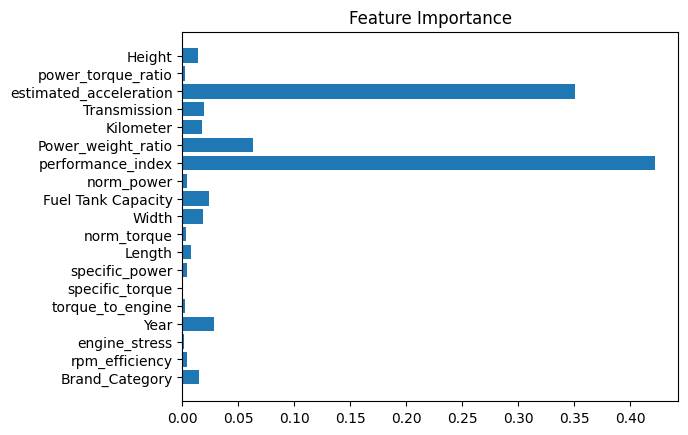

In [63]:
import matplotlib.pyplot as plt
importances = model_XGBRegressor.feature_importances_
plt.barh(Feature_seleted, importances)
plt.title("Feature Importance")
plt.show()

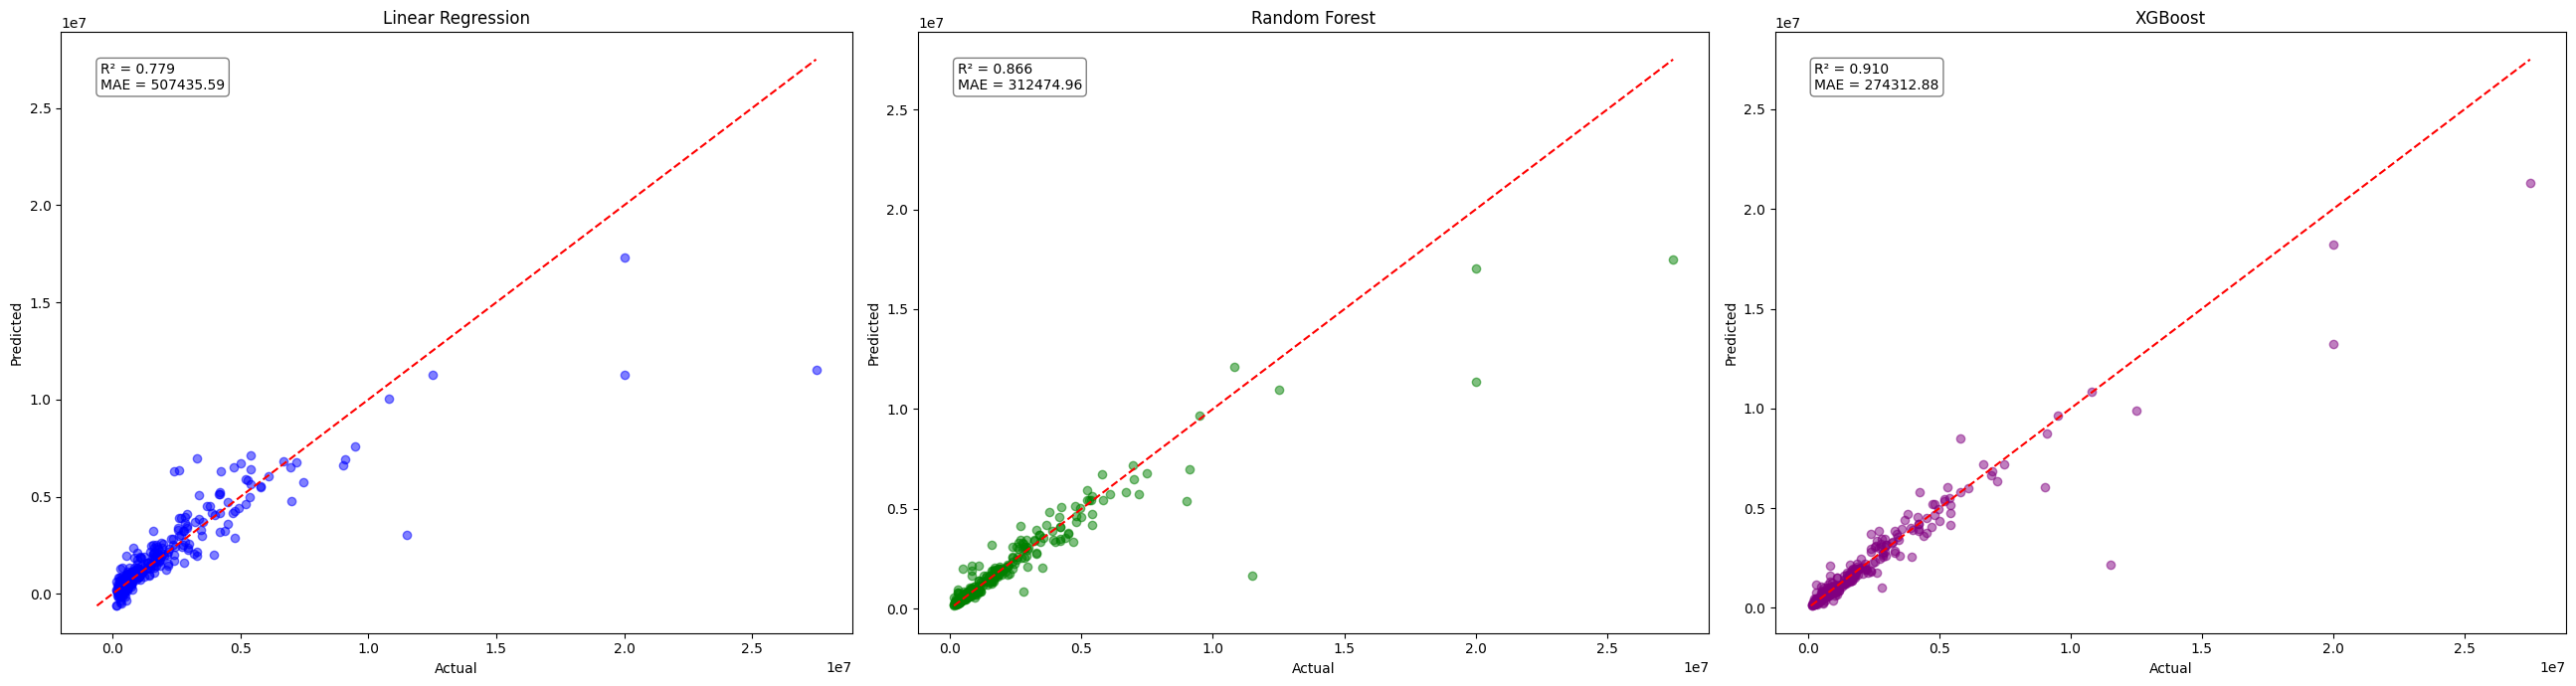

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# احسب metrics لكل موديل
metrics = {
    "Linear Regression": {
        "y_pred": y_pred_linear_regression,
        "R2": r2_score(y_test, y_pred_linear_regression),
        "MAE": mean_absolute_error(y_test, y_pred_linear_regression)
    },
    "Random Forest": {
        "y_pred": y_pred_RandomForestRegressor,
        "R2": r2_score(y_test, y_pred_RandomForestRegressor),
        "MAE": mean_absolute_error(y_test, y_pred_RandomForestRegressor)
    },
    "XGBoost": {
        "y_pred": y_pred_XGBRegressor,
        "R2": r2_score(y_test, y_pred_XGBRegressor),
        "MAE": mean_absolute_error(y_test, y_pred_XGBRegressor)
    }
}

# إعداد figure و axes
fig, axes = plt.subplots(1, 3, figsize=(26, 7))

colors = ["blue", "green", "purple"]

for i, (model_name, data) in enumerate(metrics.items()):
    y_pred = data["y_pred"]
    R2 = data["R2"]
    MAE = data["MAE"]

    # Scatter: Predicted vs Actual
    axes[i].scatter(y_test, y_pred, color=colors[i], alpha=0.5)

    # خط y=x
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[i].plot([min_val, max_val], [min_val, max_val], 'r--')

    axes[i].set_title(f"{model_name}")
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")

    # Metrics text
    axes[i].text(0.05, 0.95, f"R² = {R2:.3f}\nMAE = {MAE:.2f}",
                 transform=axes[i].transAxes,
                 verticalalignment='top',
                 bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()
